In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmedData = pd.read_csv("time_series_covid_19_confirmed.csv")

In [3]:
dates = confirmedData.columns[4:]

In [4]:
dictionary = {country:confirmedData[confirmedData['Country/Region']==country][dates].values[0] for country in confirmedData["Country/Region"] }

In [5]:
countryVDF = pd.DataFrame(dictionary,index=pd.DatetimeIndex(dates))

In [6]:
countryVDF.to_csv('generated_country_wise_corona_data.csv')

c:\users\cchi\appdata\local\continuum\anaconda3\envs\py362\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


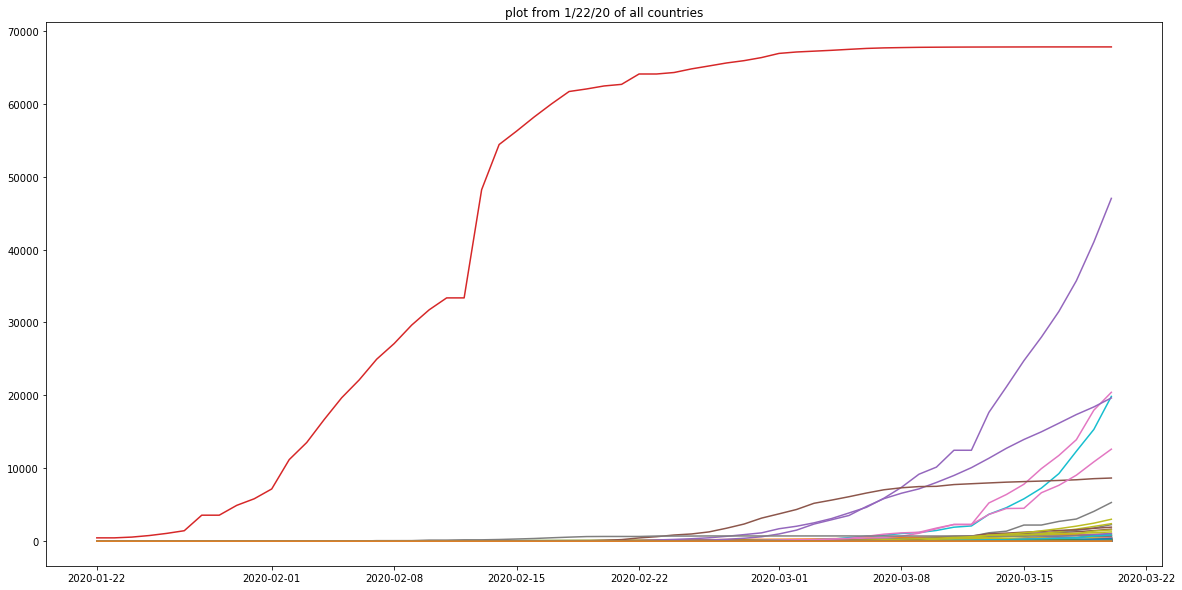

In [7]:
plt.figure(figsize=(20,10))
plt.plot(countryVDF)
# plt.legend(loc="upper left")
plt.title("plot from 1/22/20 of all countries")
plt.show()

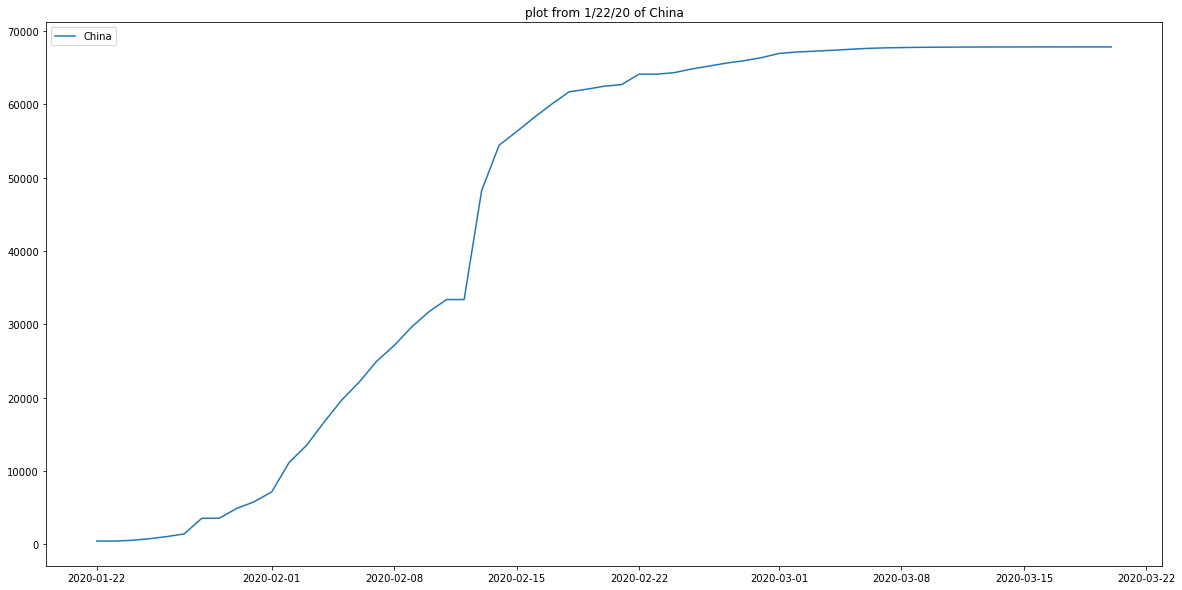

In [8]:
plt.figure(figsize=(20,10))
plt.plot(countryVDF['China'],label='China')
plt.legend(loc="upper left")
plt.title("plot from 1/22/20 of China")
plt.show()

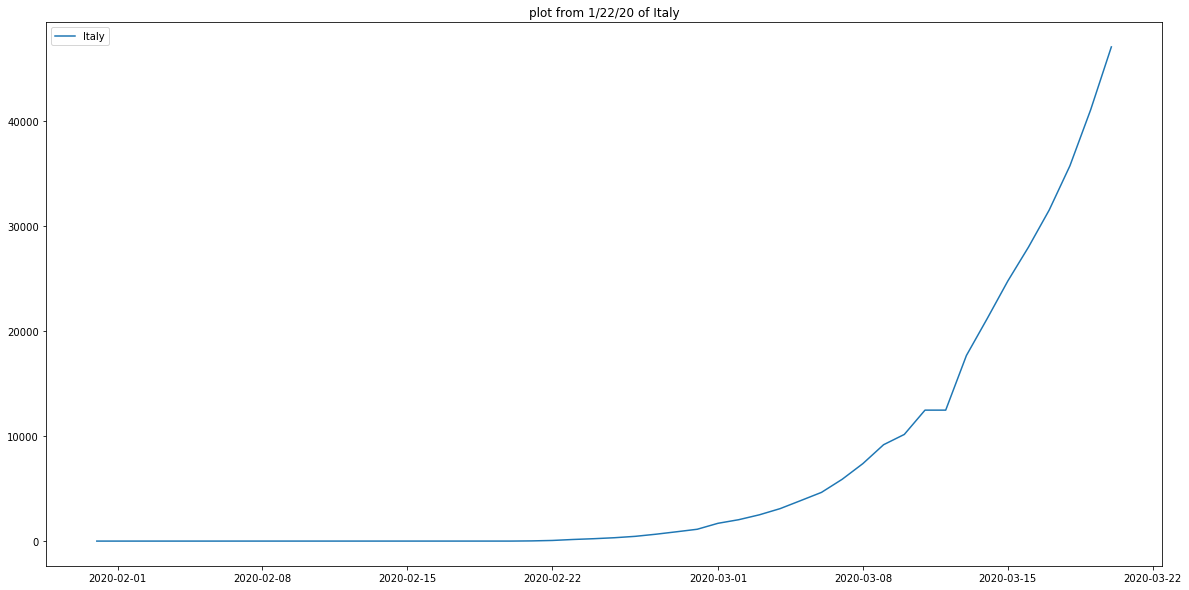

In [9]:
plt.figure(figsize=(20,10))
plt.plot(countryVDF['Italy'][countryVDF['Italy']>0],label='Italy')
plt.legend(loc="upper left")
plt.title("plot from 1/22/20 of Italy")
plt.show()

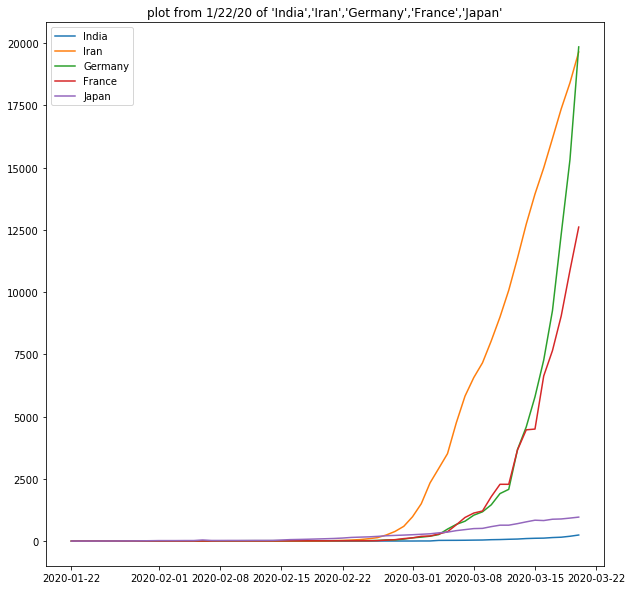

In [10]:
plt.figure(figsize=(10,10))
countriestoPlot = ['India','Iran','Germany','France','Japan']
for country in countriestoPlot:
    plt.plot(countryVDF[country],label=country)
plt.legend(loc="upper left")
plt.title("plot from 1/22/20 of 'India','Iran','Germany','France','Japan'")
plt.show()

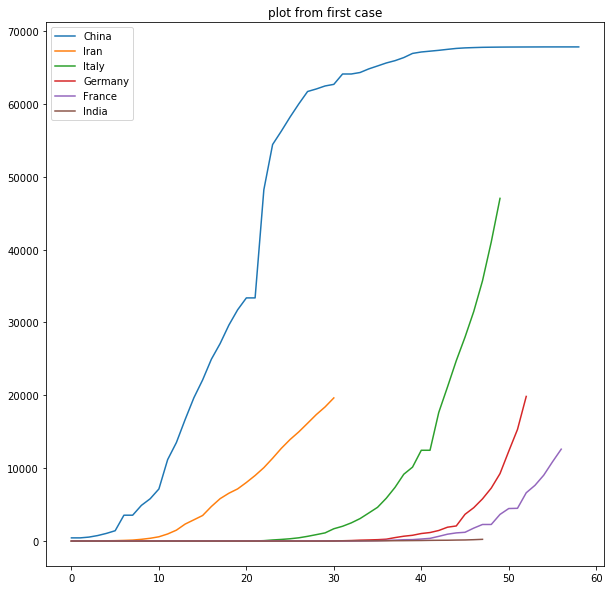

In [11]:
# countryVDF[['India']][countryVDF[['India']] >0]
countriestoPlot = ['China','Iran','Italy','Germany','France','India']
plt.figure(figsize=(10,10))
for country in countriestoPlot:
    plt.plot(countryVDF[country].loc[countryVDF[country] > 1].values,label=country)
plt.legend(loc="upper left")
plt.title("plot from first case")
plt.show()

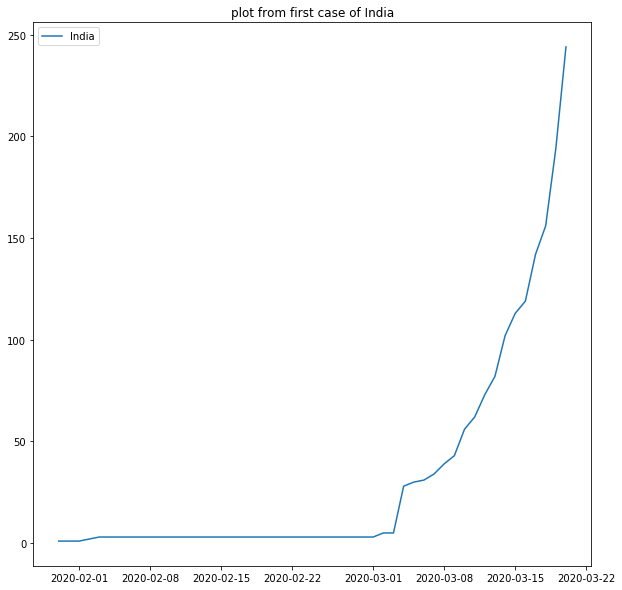

In [12]:
plt.figure(figsize=(10,10))
plt.plot(countryVDF['India'].loc[countryVDF['India'] > 0],label='India')
plt.legend(loc="upper left")
plt.title("plot from first case of India")
plt.show()

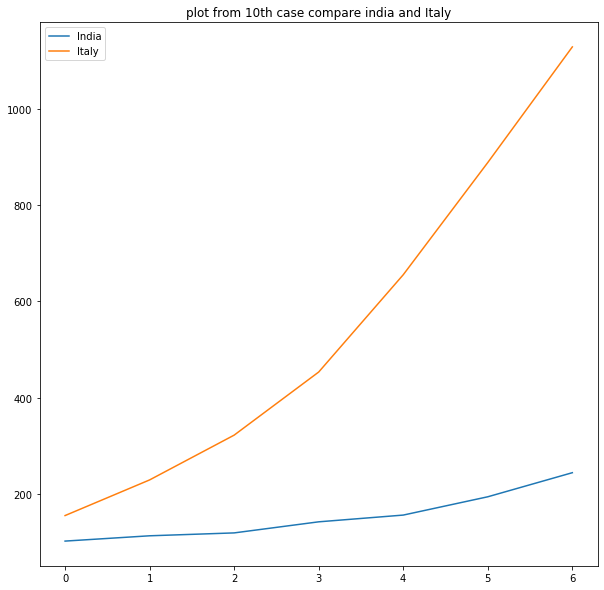

In [13]:
countriestoPlot = ['India','Italy']
plt.figure(figsize=(10,10))
plt.plot(countryVDF['India'].loc[countryVDF['India'] > 100].values,label="India")
plt.plot(countryVDF['Italy'].loc[countryVDF['Italy'] > 100][:len(countryVDF['India'].loc[countryVDF['India'] > 100].values)].values,label="Italy")
plt.legend(loc="upper left")
plt.title("plot from 10th case compare india and Italy")
plt.show()

In [14]:
import numpy as np

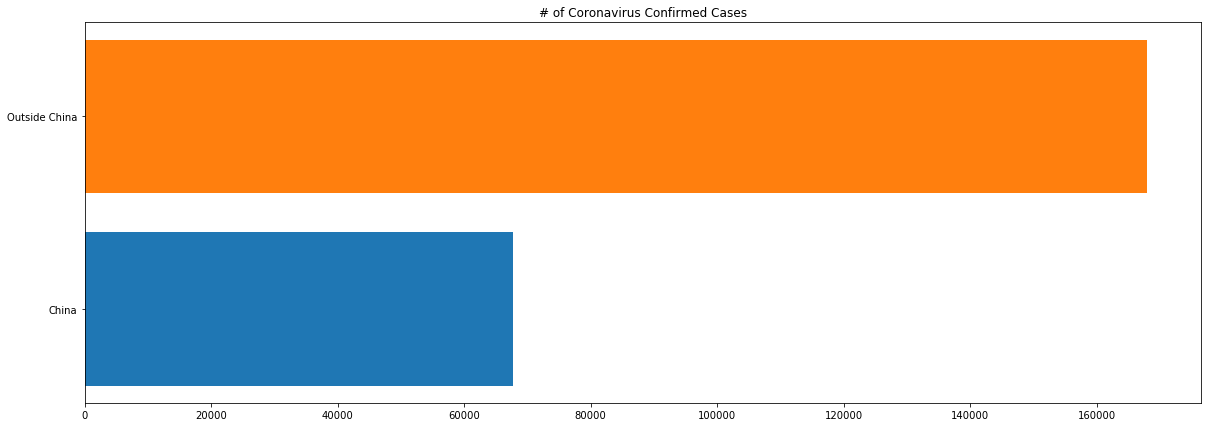

In [15]:
chinaConfirmed = countryVDF['China'][-1]
outsideChinaConfirmed = np.sum(countryVDF.iloc[-1,:].values) - chinaConfirmed
plt.figure(figsize=(20, 7))
plt.barh('China', chinaConfirmed)
plt.barh('Outside China', outsideChinaConfirmed)
plt.title('# of Coronavirus Confirmed Cases')
plt.show()

In [16]:
from statsmodels.tsa import holtwinters as hw

In [17]:
ExpoSmoothIndia = hw.ExponentialSmoothing(countryVDF['India'].loc[countryVDF['India'] > 0], 
                                    trend="mul", 
                                    damped=False, 
                                    seasonal=None, 
                                    seasonal_periods=None).fit(optimized=True)

c:\users\cchi\appdata\local\continuum\anaconda3\envs\py362\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\cchi\appdata\local\continuum\anaconda3\envs\py362\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
c:\users\cchi\appdata\local\continuum\anaconda3\envs\py362\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [18]:
ExpoSmoothIndia.forecast(7).astype(int)

2020-03-21    283
2020-03-22    332
2020-03-23    389
2020-03-24    456
2020-03-25    535
2020-03-26    627
2020-03-27    735
Freq: D, dtype: int32

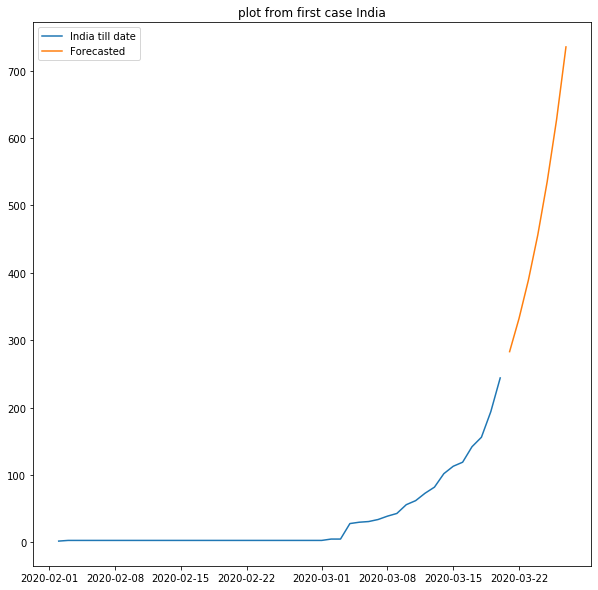

In [19]:
plt.figure(figsize=(10,10))
plt.plot(countryVDF['India'].loc[countryVDF['India'] > 1],label="India till date")
plt.plot(ExpoSmoothIndia.forecast(7).astype(int),label="Forecasted")
plt.legend(loc="upper left")
plt.title("plot from first case India")
plt.show()